In [73]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Reading the CSVs for results of sentimental analysis and tweet filtering

In [74]:
amazon = pd.read_csv('dataset/Sentiment_amazon_tweets2.csv')
tesla = pd.read_csv('dataset/Sentiment_tesla_tweets2.csv')
microsoft= pd.read_csv('dataset/Sentiment_microsoft_tweets2.csv')
google= pd.read_csv('dataset/Sentiment_google_tweets2.csv')
apple = pd.read_csv('dataset/Sentiment_apple_tweets2.csv')

In [75]:
tesla.head()

,Unnamed: 0,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,tidy_tweet,compound,neg,neu,pos,Prices
0,3935144,1145483574717497344,muckdog,2019-07-01,Had an interesting conversation with friends y...,0,1,0,AMZN,interesting conversation with friends yesterda...,1.0000,0.046,0.799,0.154,96.109497
1,3937498,1145844868457095168,lockingprofits,2019-07-02,"$amzn run about to start, are u on board? Prim...",0,1,2,AMZN,amzn about start board Prime will here before ...,1.0000,0.048,0.775,0.177,96.715500
2,3940653,1146207985888313345,livebutlearn,2019-07-03,Markets looking to go up higher most stocks ar...,0,0,0,AMZN,Markets looking higher most stocks super bulli...,1.0000,0.052,0.798,0.150,96.949997
3,3943543,1146573195585175557,pjl001,2019-07-04,"Coca-Cola Gets Good News, Monster Beverage Get...",0,1,0,AMZN,Coca Cola Gets Good News Monster Beverage Gets...,0.9999,0.037,0.788,0.175,90.603933
4,3945591,1147188907886485504,TheBurdetteLawF,2019-07-05,#estate asset watch - most active options on F...,0,0,1,AMZN,#estate asset watch most active options Friday...,0.9997,0.048,0.805,0.147,97.145500


Dropping columns which are not required for ML modeling

In [76]:
def drop_columns(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df.drop(columns=['tweet_id','writer','body','comment_num','retweet_num','like_num','ticker_symbol','tidy_tweet'],axis=1)
    return df
    

In [77]:
tesla = drop_columns(tesla)
amazon = drop_columns(amazon)
microsoft = drop_columns(microsoft)
apple = drop_columns(apple)
google = drop_columns(google)

In [78]:
tesla.head()

,Date,compound,neg,neu,pos,Prices
0,2019-07-01,1.0000,0.046,0.799,0.154,96.109497
1,2019-07-02,1.0000,0.048,0.775,0.177,96.715500
2,2019-07-03,1.0000,0.052,0.798,0.150,96.949997
3,2019-07-04,0.9999,0.037,0.788,0.175,90.603933
4,2019-07-05,0.9997,0.048,0.805,0.147,97.145500


Using Random forest to predict Tesla stock prices

In [163]:
tesla_x = tesla.iloc[:, 1:5].values
tesla_y = tesla.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(tesla_x, tesla_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=300, random_state=12, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [164]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2.3439
Mean Squared Error: 9.1825
Root Mean Squared Error: 3.0303
(R^2) Score: -2.4959
Train Score : 83.83% and Test Score : -249.59% using Random Tree Regressor.
Accuracy: 97.37 %.


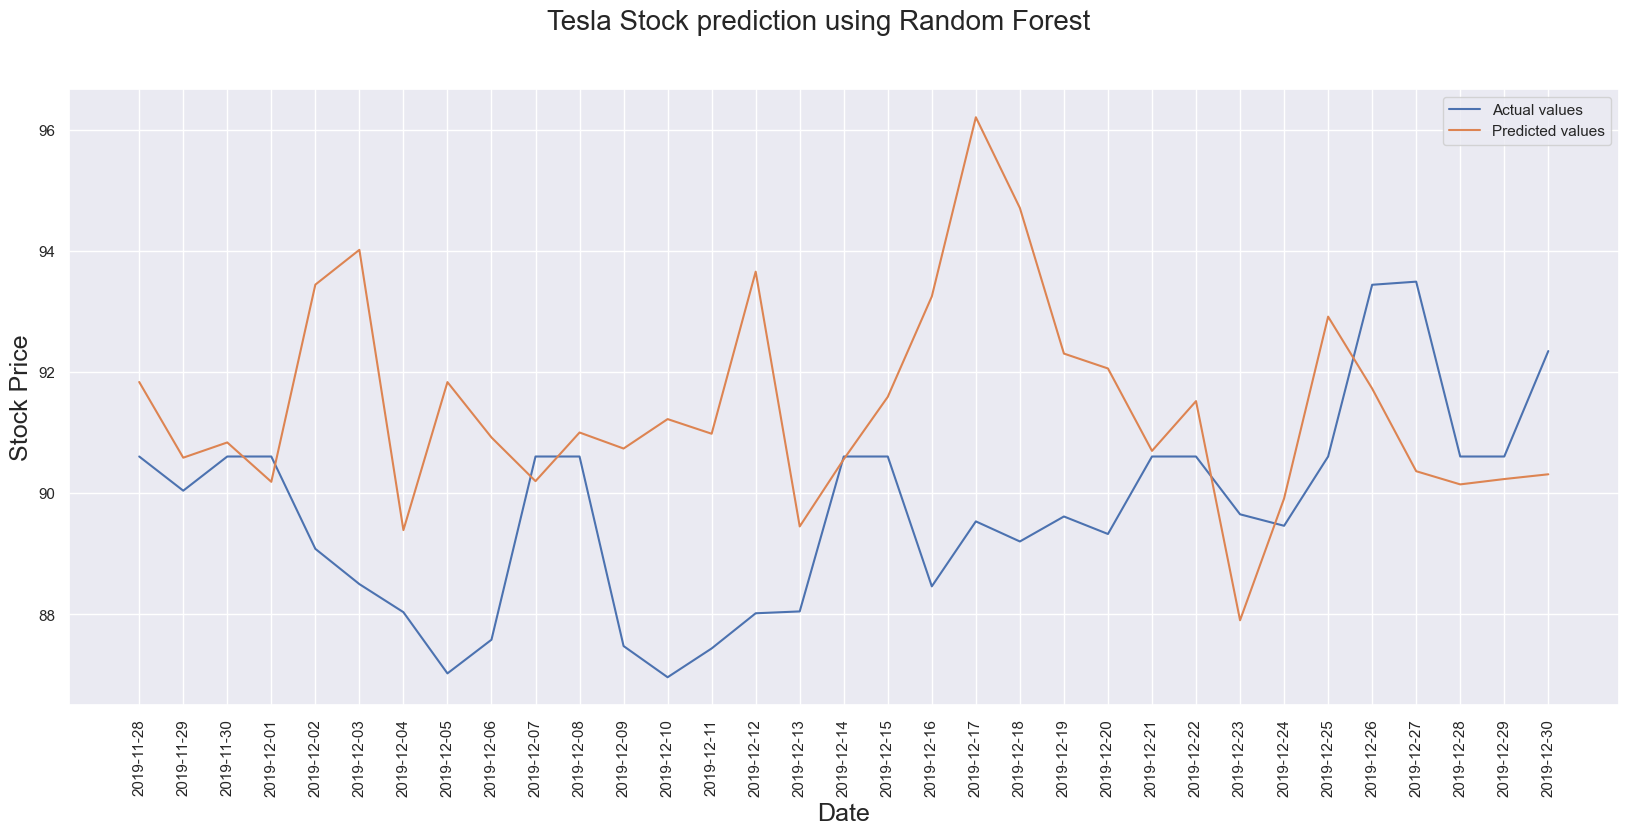

In [165]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Tesla Stock prediction using Random Forest', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Random forest to predict Amazon stock prices

In [160]:
amazon_x = amazon.iloc[:, 1:5].values
amazon_y = amazon.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(amazon_x, amazon_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=300, random_state=12, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 4.3594
Mean Squared Error: 31.0208
Root Mean Squared Error: 5.5696
(R^2) Score: -1.4018
Train Score : 82.01% and Test Score : -140.18% using Random Tree Regressor.
Accuracy: 82.61 %.


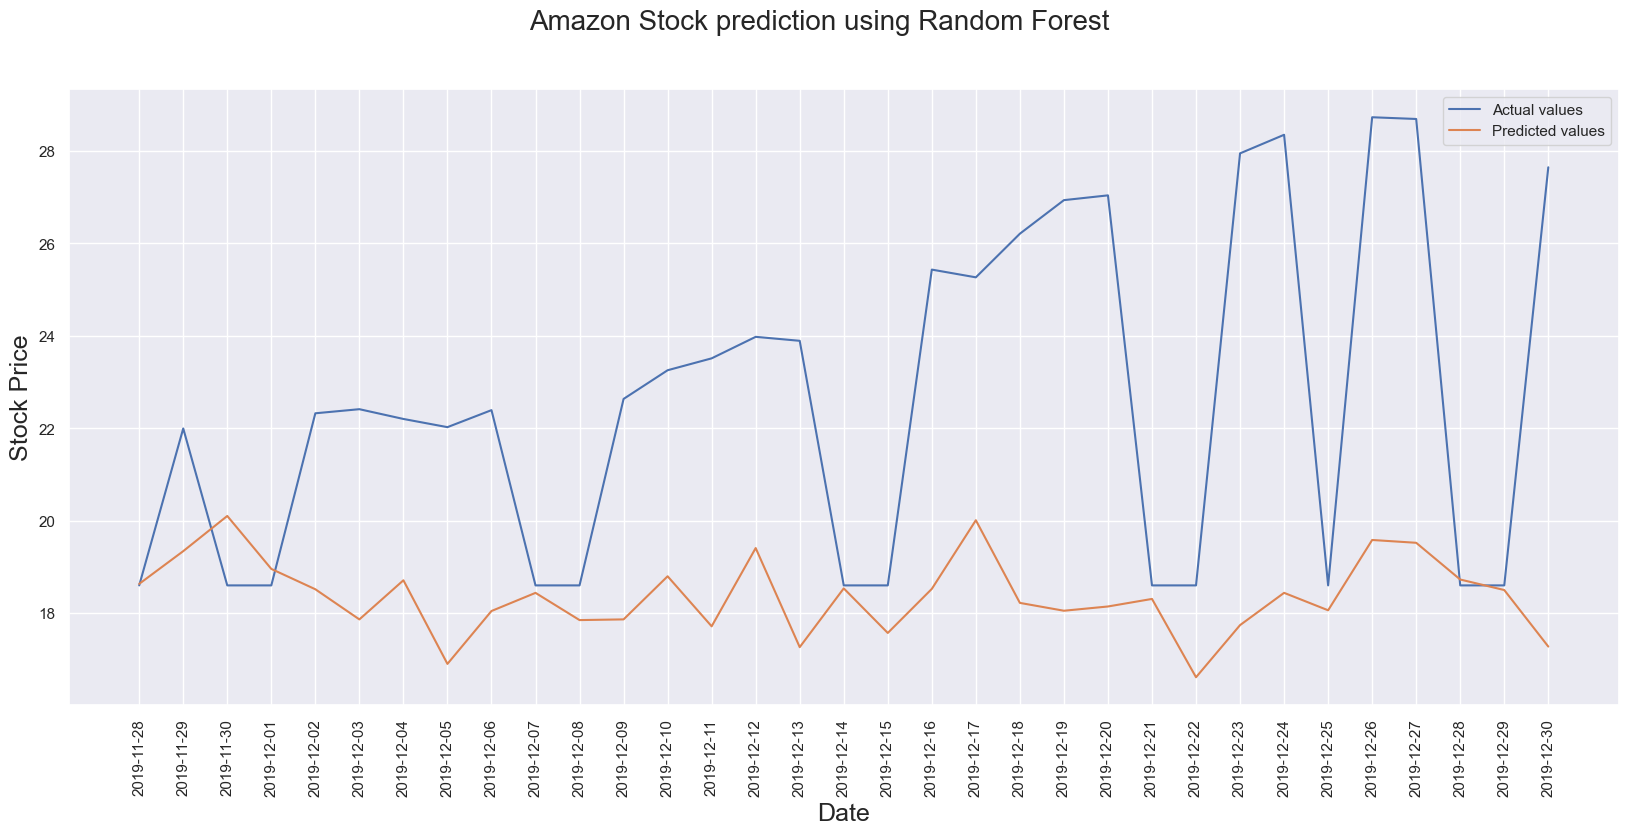

In [161]:
plt.figure(figsize=(20, 8))
plt.plot(amazon['Date'].tail(33), y_test, label = "Actual values")
plt.plot(amazon['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Amazon Stock prediction using Random Forest', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Random forest to predict Apple stock prices

In [157]:
apple_x = apple.iloc[:, 1:5].values
apple_y = apple.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(apple_x, apple_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=300, random_state=12, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 8.4649
Mean Squared Error: 106.5783
Root Mean Squared Error: 10.3237
(R^2) Score: -2.5966
Train Score : 74.52% and Test Score : -259.66% using Random Tree Regressor.
Accuracy: 87.62 %.


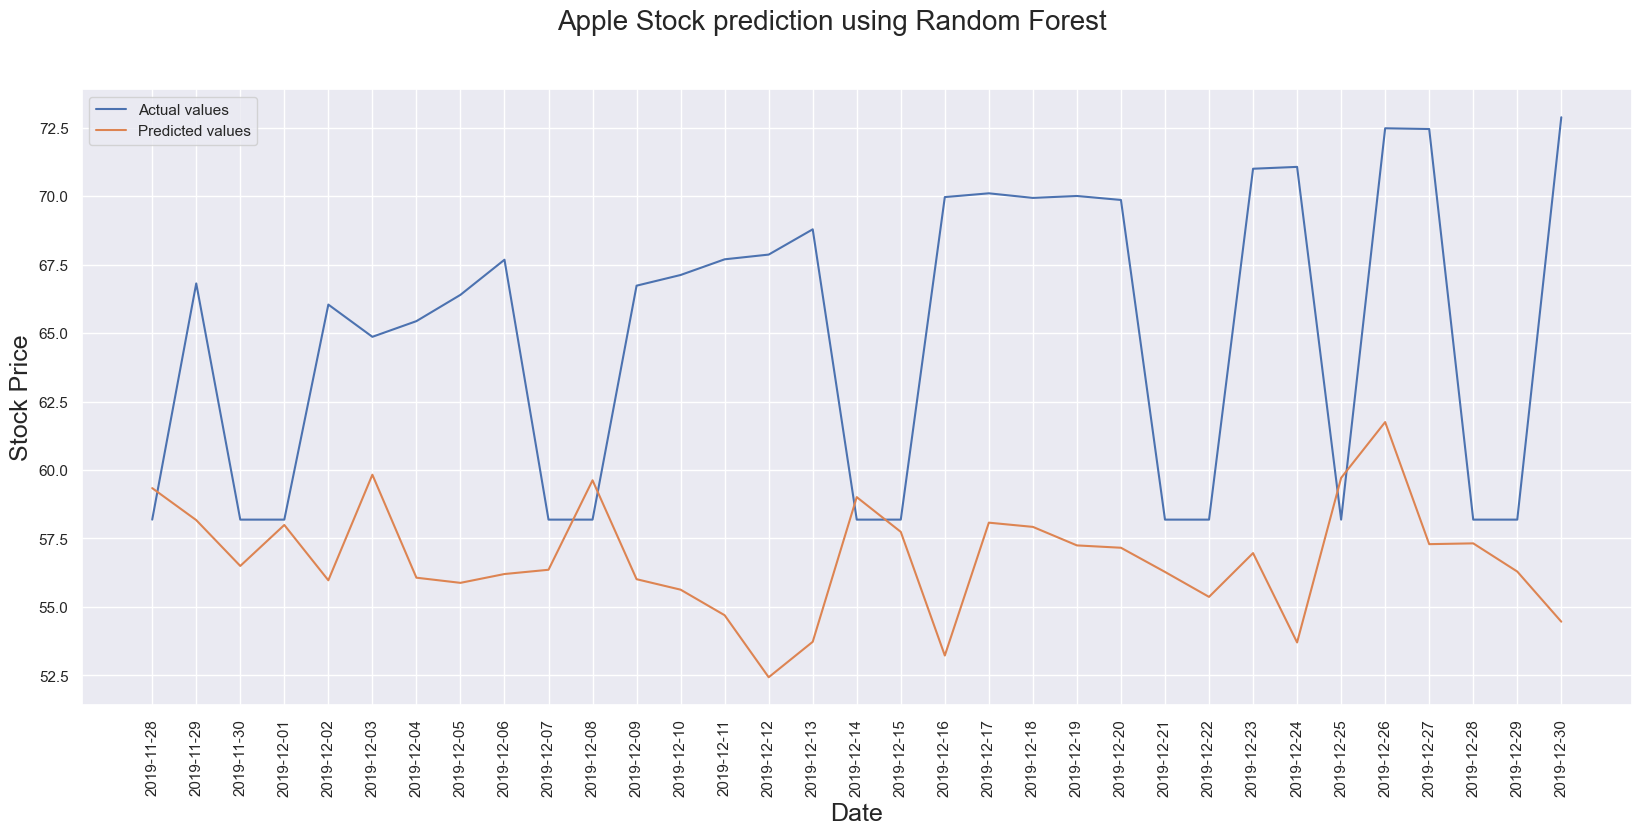

In [159]:
plt.figure(figsize=(20, 8))
plt.plot(apple['Date'].tail(33), y_test, label = "Actual values")
plt.plot(apple['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Apple Stock prediction using Random Forest', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Random forest to predict Google stock prices

In [170]:
google_x = google.iloc[:, 1:5].values
google_y = google.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(google_x, google_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=300, random_state=12, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 3.157
Mean Squared Error: 15.7886
Root Mean Squared Error: 3.9735
(R^2) Score: -1.327
Train Score : 85.56% and Test Score : -132.70% using Random Tree Regressor.
Accuracy: 95.26 %.


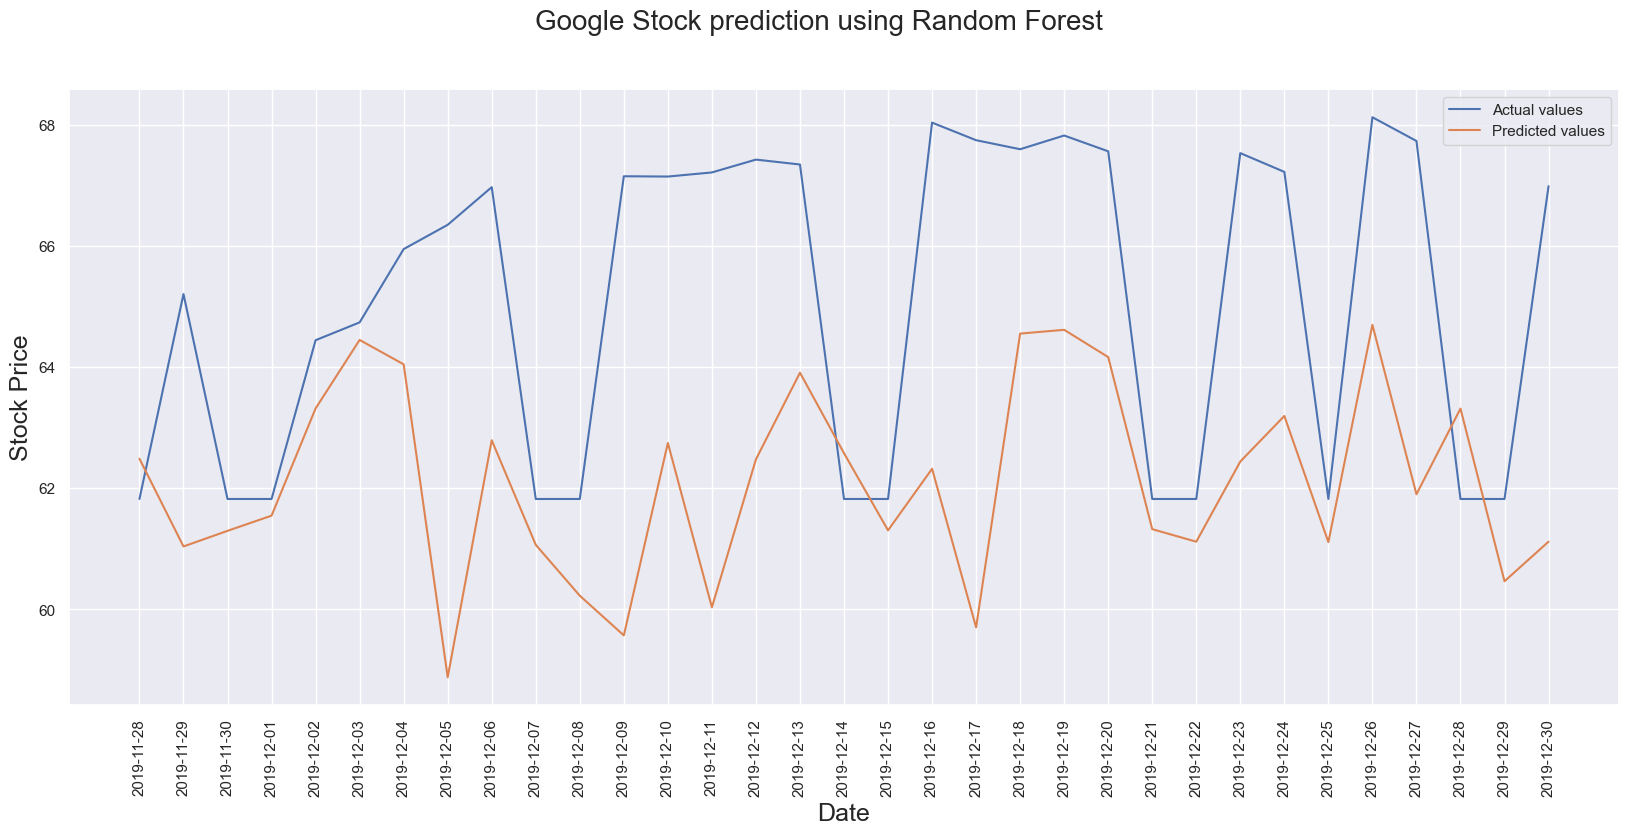

In [171]:
plt.figure(figsize=(20, 8))
plt.plot(google['Date'].tail(33), y_test, label = "Actual values")
plt.plot(google['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Google Stock prediction using Random Forest', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using Random forest to predict Microsoft stock prices

In [172]:
microsoft_x = microsoft.iloc[:, 1:5].values
microsoft_y = microsoft.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(microsoft_x, microsoft_y, test_size=0.180,  shuffle= False)


scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

model = RandomForestRegressor(n_estimators=300, random_state=12, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 8.5365
Mean Squared Error: 118.2779
Root Mean Squared Error: 10.8756
(R^2) Score: -2.0731
Train Score : 84.35% and Test Score : -207.31% using Random Tree Regressor.
Accuracy: 94.46 %.


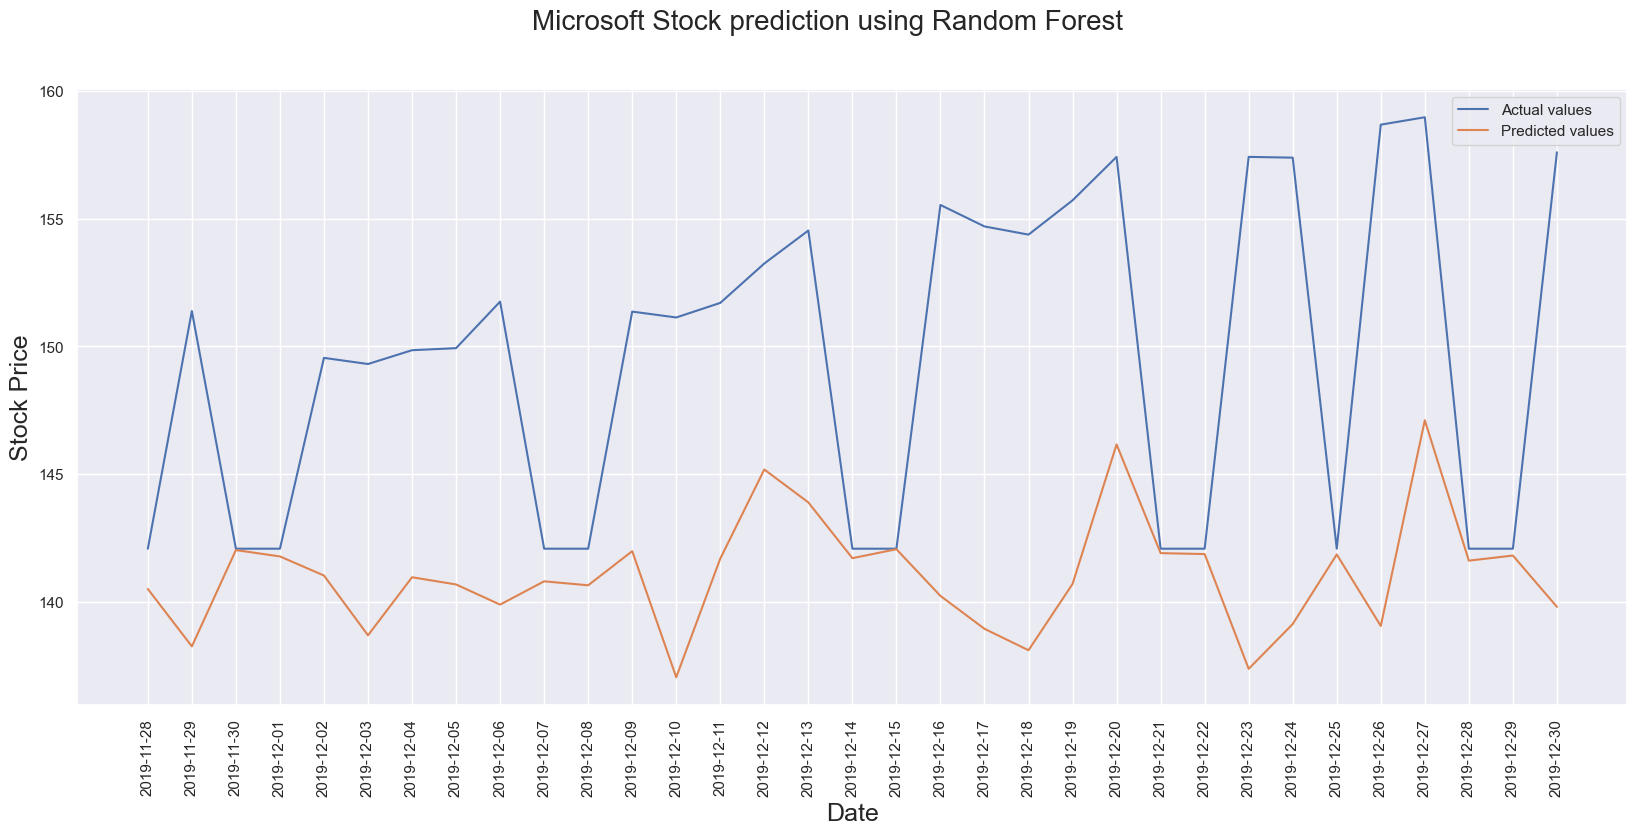

In [173]:
plt.figure(figsize=(20, 8))
plt.plot(microsoft['Date'].tail(33), y_test, label = "Actual values")
plt.plot(microsoft['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Microsoft Stock prediction using Random Forest', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()